## Churn Prediction within Telecom Industry

####  Preparing a Training Set and Training a Decision Tree

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%).<br><br>


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

In [2]:
# Function to split the data set into training and test data according to the train_percetage
def splitdf(df,train_percentage):
    
    # sample() returns random sample of items of dataframe to train_df, where frac specifies the fraction of rows of whole to be returned 
    # random_state is used as a seed for the random number generator
    train_df = df.sample(frac= (train_percentage*0.01), random_state=100)
   
    # Using drop() to drop all rows with indices in train_df and store rest in test_df
    test_df = df.drop(train_df.index)
    
    return(train_df, test_df)

In [3]:
df = pd.read_csv("cell2cell_data.csv")
df.columns = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcown", "creditcd", "retcalls", "churnedep"]

# Calling splitdf() function above to split the data set into 80% training and rest i.e. 20% in test
train_df , test_df = splitdf(df, train_percentage =80)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? 



<p>
<span style="color:blue">
To show that our data is indeed radomly sampled, we can train our model with the training data and check the accuracy on both training and test data. If our training data would have a selection bias, i.e. it is not representative of the overall population, it would have a good training accuracy but test accuracy would be poor, since the test data could have general examples as well, that were not similar to the training data that was selectively chosen. 
We can also check for AUC when we have imbalanced classes, it is useful to report AUC for precision recall curve and if it is 0.5 it means its a random model.
<br>
Another way to visually see if their is a selection bias in this case, would be plotting histogram taking the target varibale for the all examples in the original data set and all examples in randomly sampled training data and see if the histogram of train data is representative of the entire population like the entire data set. For example, if we selectively had chosen training set with most examples with target varible labeled as 1, the histogram would show us that the examples in training data are not representative of the entire population as in the entire data set
</span>
</p>

3\. Build and train a decision tree classifier using `DecisionTreeClassifier()` on train_df to predict the `"churndep"` target variable. 


In [4]:
# Choosing splitting criterion as Entropy
dtc_model = DecisionTreeClassifier(criterion = "entropy")
# x_train stores the train_df features without target variable column
x_train = train_df.drop("churnedep",1)
# y_train stores the target variable column with label
y_train = train_df.churnedep
# decision tree classifier from the training set(x_train) and label(y_train)
dtc_model = dtc_model.fit(x_train,y_train)

4\. Show a bar plot of feature names and their feature importance.

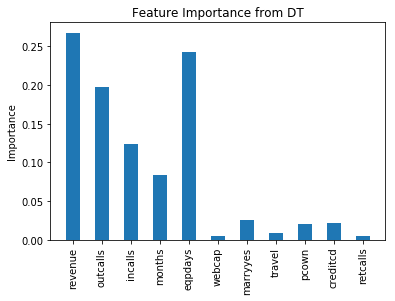

In [5]:
fig, ax = plt.subplots()
# setting the height of the bar as the feature importances returned by feature_imporantances_attribute
ax.bar(np.arange((len(df.columns)-1)), dtc_model.feature_importances_, width = 0.5)
ax.set_xticks(np.arange(len(dtc_model.feature_importances_)))
# Setting x tick labels with the names of the columns 
ax.set_xticklabels(x_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Importance')
#Show the bar chart
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? How would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?


In [6]:
# Computing pearson correlation to check relationship between features 
train_df.corr(method ="pearson")

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churnedep
revenue,1.000000,0.495325,0.387724,-0.014367,-0.221142,0.105339,-0.094360,-0.044009,-0.083872,-0.091267,0.009783,-0.014763
outcalls,0.495325,1.000000,0.732143,-0.040066,-0.243295,0.113284,-0.128036,-0.041806,-0.095267,-0.102353,0.009563,-0.038824
incalls,0.387724,0.732143,1.000000,-0.026197,-0.203022,0.092098,-0.095086,-0.038207,-0.080634,-0.082739,0.004024,-0.048870
months,-0.014367,-0.040066,-0.026197,1.000000,0.486083,-0.253786,0.085188,0.043129,0.062814,0.140433,0.070180,0.020015
eqpdays,-0.221142,-0.243295,-0.203022,0.486083,1.000000,-0.394676,0.116509,0.045985,0.069876,0.126282,-0.024434,0.113483
webcap,0.105339,0.113284,0.092098,-0.253786,-0.394676,1.000000,-0.064043,-0.006294,-0.032139,-0.069340,-0.010326,-0.069161
marryyes,-0.094360,-0.128036,-0.095086,0.085188,0.116509,-0.064043,1.000000,0.145880,0.334120,0.435991,-0.022116,-0.008273
travel,-0.044009,-0.041806,-0.038207,0.043129,0.045985,-0.006294,0.145880,1.000000,0.255039,0.161568,-0.009353,-0.008789
pcown,-0.083872,-0.095267,-0.080634,0.062814,0.069876,-0.032139,0.334120,0.255039,1.000000,0.296541,-0.020355,-0.004782
creditcd,-0.091267,-0.102353,-0.082739,0.140433,0.126282,-0.069340,0.435991,0.161568,0.296541,1.000000,-0.004154,-0.013522


<p>
<span style="color:blue">
From the above, we can see that for the top three important features- revenue, eqpdays and outcalls have the following vaules of correlation<br>

revnue and eqpdays: -0.221142 (negatively correlated)<br>
revenue and outcalls: 0.495325 (positively correlated)<br>
outcalls and eqpdays: -0.243295 (negatively correlated)<br>
churnedep and revenue: -0.014763 (negatively correlated)<br>
churnedep and outcalls: -0.038824(negatively correlated)<br>
churnedep and eqpdays: 0.113483 (positively correlated)<br><br>

From the positive correlation between revenue and outcalls, and negative correlation between churnedep and outcalls and revenue, we can interpret that, customers having high average monthly revenue make more outbound calls which suggests that those customers find the services affordable and therefore would be okay with the current carrier and are less likely to churn. <br>
Also, the negative correlation between outcalls and eqpdays, and a potitive correlation between churnedep and eqpdays suggests that as the number of days customer has had the equipment increases the outbound calls decreases maybe because of equipments slow down as they age and that makes them more likely to buy a new equipment which may make them flexible and open to other carriers and make them more likely to churn.

</span>
</p>

6\. Using the classifier built, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?


In [7]:
train_df_accuracy = (dtc_model.score(x_train,y_train)*100)

test_df_accuracy = (dtc_model.score(test_df.drop("churnedep",1),test_df.churnedep)*100)

print("accuracy on train_df is",train_df_accuracy,"%")
print("accuracy on test_df is",test_df_accuracy,"%")

accuracy on train_df is 99.9905914822 %
accuracy on test_df is 52.082288008 %


#### Finding a Good Decision Tree 
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 


In [8]:
# using logspace to return numbers spaced evenly on a log scale
# 6 , 4 to 11 
min_samples_split = np.logspace(7.0,12.0,num =10, base = 2,dtype = int)
min_samples_leaf = np.logspace(5.0,10.0,num =10, base = 2,dtype = int)

print("min_samples_split: ")
print(min_samples_split)
print("min_samples_leaf: ")
print(min_samples_leaf)

min_samples_split: 
[ 128  188  276  406  597  877 1290 1896 2786 4096]
min_samples_leaf: 
[  32   47   69  101  149  219  322  474  696 1024]


<p>
<span style="color:blue">
We know that choosing the default values for min_samples_split and min_samples_leaf which are 2 and 1 respectively are very low and would lead to overfitting. On the other hand, choosing a very high value, would not train the model correctly. Thus, choosing values which were not at the extremes and covers a properly distributed range would be a appropriate choice, and for that reason I went ahead with logspace for values spaced evenly on a log scale
</span>
</p>

3\. For each combination of values (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options.


In [9]:
# dict to store the accuracy score
accuracy = {}
for samples in min_samples_split:
    # making the value of min_samples_leaf as the key
    accuracy[samples] = []

maxi = -1
max_leaf = 0
max_split = 0

# list to store the accuracy obtained by combinations 
#looping of min_samples_leaf for every min_samples_split paramter to build classifier
for i in min_samples_split:
    for j in min_samples_leaf:
        clf = DecisionTreeClassifier(criterion = "entropy",min_samples_leaf = j,  min_samples_split = i) #defining the parameteter
        # using x_train and y_train(label) to train the model
        clf = clf.fit(x_train,y_train)
        # appeding accuracy for test_df by checking the actual labels which corresponds to that min_samples_split through res
        res = clf.score(test_df.drop("churnedep",1),test_df.churnedep)
        accuracy[i].append(res)
        # just to get the precise result
        if res > maxi:
            maxi = res
            max_leaf = j
            max_split = i
            


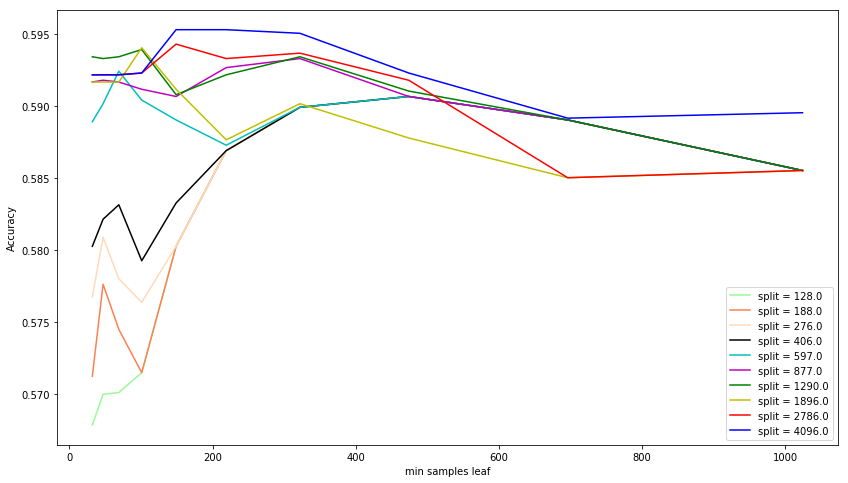

maximum accuracy 0.595333667837 for min sample leaf value 149 and min sample split 4096


In [10]:
# defining a list with colors for different combinations 
colors = ["b","r","y","g","m","c","k","peachpuff","coral","palegreen"]

fig = plt.figure(figsize = (14, 8))
# for every min_samples_split, plotting a new line with min_sample_leaf on the x-axis
for sample in min_samples_split:
    plt.plot((min_samples_leaf), accuracy[sample],color= colors.pop(), label='split = {}'.format(np.floor(sample)))
    
plt.xlabel('min samples leaf')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

print("maximum accuracy", maxi, "for min sample leaf value",max_leaf,"and min sample split",max_split)

<p>
<span style="color:blue">
As we can see from the plot, when the min samples leaf is 149 and min sample split is 4096, we get the best accuracy which is around 59.53%
</span>
</p>

<p>
<span style="color:blue">
Churn prediction model would be very essential and profitable for a real business environment. It would helps us not only to learn why customers are churning to help us shape our services to avoid loss in future but also give us time to come up strategies to retain them. <br>
With the help of a good prediction model, we can identify the customers who are at a risk of leaving and offer them with apporiate offers and promotions which would persuade the customers to stay in the business. It could be something like free rewards or other incentives on their plans. We can also use the churn model and find potential customers who are likely to churn and provide them with offers that would entice them to join the business. For example, these days, we have buy 1 get 1 iphone phones from specific carriers to encourage a person buying a new phone to avail this offer from the specific telecom company. A churn prediction model could be very useful in shaping such strategies to keep the existing customers and get more.
</span>
</p>